##Predicción de Sobrevivientes del Titanic usando Random Forest##


Introducción
El hundimiento del RMS Titanic en 1912 es uno de los desastres marítimos más famosos de la historia. De las 2,224 personas a bordo, solo 710 sobrevivieron, lo que hace que este evento sea un caso de estudio interesante para el análisis de datos y la predicción de supervivencia.

En este proyecto, utilizaremos un conjunto de datos que contiene información sobre los pasajeros del Titanic, como su clase de pasaje (Pclass), género (Sex), número de hermanos/cónyuges a bordo (SibSp), número de padres/hijos a bordo (Parch), entre otros. Nuestro objetivo es predecir si un pasajero sobrevivió o no basándonos en estas características.

Metodología
Para abordar este problema, utilizaremos un algoritmo de aprendizaje automático supervisado llamado Random Forest (Bosque Aleatorio). Random Forest es un método de ensamble que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste. Es especialmente útil porque:

Maneja bien datos categóricos y numéricos: Puede trabajar con características como el género (Sex) y la clase de pasaje (Pclass) sin necesidad de una transformación compleja.

Es robusto frente al sobreajuste: Al promediar las predicciones de múltiples árboles, Random Forest tiende a generalizar mejor que un solo árbol de decisión.

Proporciona importancia de características: Permite identificar qué características son más relevantes para la predicción.

Flujo de trabajo
Carga y exploración de datos: Cargamos los datos de entrenamiento (train.csv) y prueba (test.csv), y realizamos una exploración inicial para entender su estructura.

Preprocesamiento: Convertimos las características categóricas (como Sex) en variables numéricas usando one-hot encoding y seleccionamos las características relevantes.

Entrenamiento del modelo: Entrenamos un modelo de Random Forest utilizando los datos de entrenamiento.

Predicción y evaluación: Realizamos predicciones sobre los datos de prueba y guardamos los resultados en un archivo CSV para su posterior evaluación.

Resultados esperados
Al final de este proceso, habremos generado un archivo (submission.csv) que contiene las predicciones de supervivencia para cada pasajero en el conjunto de prueba. Este archivo puede ser evaluado en plataformas como Kaggle para medir la precisión del modelo.

Motivación
Este proyecto no solo es un ejercicio práctico de aprendizaje automático, sino también una oportunidad para explorar cómo factores como el género, la clase social y el tamaño de la familia influyeron en las probabilidades de supervivencia durante el desastre del Titanic. Además, nos permite familiarizarnos con técnicas comunes de preprocesamiento de datos y modelado predictivo.

In [7]:
# Los archivos de datos de entrada están disponibles en el directorio "../input/"
# Por ejemplo, al ejecutar esto (haciendo clic en Run o presionando Shift+Enter) listará todos los archivos en el directorio de entrada

import os
import os
# Agrega la ruta del directorio a la lista de directorios para buscar archivos
directory_path = r'C:\Users\gerson.cordero\OneDrive - INACAP\Data Science\Data_Science_portfolio-1\Machine_Learning\Titanic_survival'
for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Cualquier resultado que escribas en el directorio actual se guardará como salida.

C:\Users\gerson.cordero\OneDrive - INACAP\Data Science\Data_Science_portfolio-1\Machine_Learning\Titanic_survival\gender_submission.csv
C:\Users\gerson.cordero\OneDrive - INACAP\Data Science\Data_Science_portfolio-1\Machine_Learning\Titanic_survival\submission.csv
C:\Users\gerson.cordero\OneDrive - INACAP\Data Science\Data_Science_portfolio-1\Machine_Learning\Titanic_survival\test.csv
C:\Users\gerson.cordero\OneDrive - INACAP\Data Science\Data_Science_portfolio-1\Machine_Learning\Titanic_survival\TitanicSurvival_MachineLearning.ipynb
C:\Users\gerson.cordero\OneDrive - INACAP\Data Science\Data_Science_portfolio-1\Machine_Learning\Titanic_survival\train.csv


In [8]:
# Importar la biblioteca pandas para manejar datos en formato de tablas (DataFrames)
import pandas as pd

# Importar la biblioteca os para manejar rutas de archivos y directorios
import os

# Cargar el conjunto de datos de entrenamiento desde un archivo CSV
# 'directory_path' es la ruta del directorio donde se encuentra el archivo
# 'filename' es el nombre del archivo CSV que contiene los datos de entrenamiento
train_data = pd.read_csv(os.path.join(directory_path, filename))

# Mostrar las primeras 5 filas del conjunto de datos de entrenamiento
# Esto es útil para inspeccionar rápidamente la estructura y los datos iniciales
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Cargar el conjunto de datos de prueba desde un archivo CSV llamado 'test.csv'
# 'directory_path' es la ruta del directorio donde se encuentra el archivo
# 'test.csv' es el nombre del archivo CSV que contiene los datos de prueba
test_data = pd.read_csv(os.path.join(directory_path, 'test.csv'))

# Mostrar las primeras 5 filas del conjunto de datos de prueba
# Esto es útil para inspeccionar rápidamente la estructura y los datos iniciales
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
# Filtrar el conjunto de datos de entrenamiento para obtener solo las filas donde la columna 'Sex' es 'female' (mujeres)
# Luego, seleccionar la columna 'Survived' para obtener el estado de supervivencia de las mujeres
women = train_data.loc[train_data.Sex == 'female']["Survived"]

# Calcular la tasa de supervivencia de las mujeres
# sum(women) suma todos los valores en la columna 'Survived', donde 1 representa "sobrevivió" y 0 representa "no sobrevivió"
# len(women) obtiene el número total de mujeres en el conjunto de datos
rate_women = sum(women) / len(women)

# Imprimir el porcentaje de mujeres que sobrevivieron
# Se multiplica por 100 para convertir la tasa en un porcentaje
print("% de mujeres que sobrevivieron:", rate_women * 100)

% de mujeres que sobrevivieron: 74.20382165605095


In [11]:
# Filtrar el conjunto de datos de entrenamiento para obtener solo las filas donde la columna 'Sex' es 'male' (hombres)
# Luego, seleccionar la columna 'Survived' para obtener el estado de supervivencia de los hombres
men = train_data.loc[train_data.Sex == 'male']["Survived"]

# Calcular la tasa de supervivencia de los hombres
# sum(men) suma todos los valores en la columna 'Survived', donde 1 representa "sobrevivió" y 0 representa "no sobrevivió"
# len(men) obtiene el número total de hombres en el conjunto de datos
rate_men = sum(men) / len(men)

# Imprimir el porcentaje de hombres que sobrevivieron
# Se multiplica por 100 para convertir la tasa en un porcentaje
print("% de hombres que sobrevivieron:", rate_men * 100)

% de hombres que sobrevivieron: 18.890814558058924


In [12]:
# Importar la clase RandomForestClassifier del módulo sklearn.ensemble
# RandomForestClassifier es un modelo de aprendizaje automático basado en árboles de decisión
from sklearn.ensemble import RandomForestClassifier

# Definir la variable objetivo (etiquetas) que queremos predecir
# 'Survived' es la columna que indica si un pasajero sobrevivió (1) o no (0)
y = train_data["Survived"]

# Definir las características (features) que se utilizarán para entrenar el modelo
# 'Pclass': Clase del pasajero (1, 2, 3)
# 'Sex': Género del pasajero (male, female)
# 'SibSp': Número de hermanos/cónyuges a bordo
# 'Parch': Número de padres/hijos a bordo
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Convertir las características categóricas en variables dummy/one-hot encoding
# Esto es necesario porque el modelo no puede trabajar directamente con texto (por ejemplo, 'male' o 'female')
X = pd.get_dummies(train_data[features])  # Datos de entrenamiento
X_test = pd.get_dummies(test_data[features])  # Datos de prueba

# Crear una instancia del modelo RandomForestClassifier
# n_estimators=100: Número de árboles en el bosque
# max_depth=5: Profundidad máxima de cada árbol
# random_state=1: Semilla para reproducibilidad
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

# Entrenar el modelo utilizando los datos de entrenamiento (X) y las etiquetas (y)
model.fit(X, y)

# Realizar predicciones sobre los datos de prueba (X_test)
predictions = model.predict(X_test)

# Crear un DataFrame con las predicciones y los IDs de los pasajeros
# 'PassengerId': Identificador único de cada pasajero
# 'Survived': Predicciones del modelo (1 o 0)
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})

# Guardar las predicciones en un archivo CSV llamado 'submission.csv'
# index=False evita que se guarde el índice del DataFrame en el archivo
output.to_csv('submission.csv', index=False)

# Mensaje de confirmación
print("¡Tu archivo de submission fue guardado exitosamente!")

¡Tu archivo de submission fue guardado exitosamente!


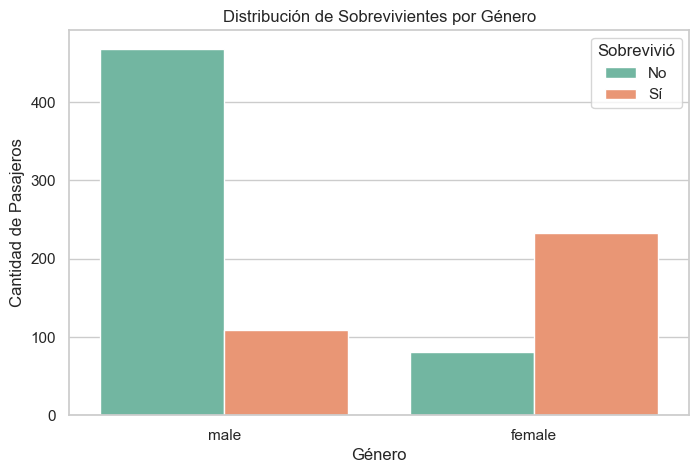

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear un gráfico de barras para la distribución de sobrevivientes por género
plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=train_data, palette='Set2')
plt.title('Distribución de Sobrevivientes por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Pasajeros')
plt.legend(title='Sobrevivió', loc='upper right', labels=['No', 'Sí'])
plt.show()